In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
visa_df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\NareshIT\Datasets\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [22]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns
cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

- we have two types of scaling
    - z score 
    - min max scaler(Normalization)

In [23]:
# step1
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [24]:
# step2
meann=np.mean(wage_data)
meann

74455.81459209183

In [25]:
# step3
stdd=np.std(wage_data)
stdd

52814.90589711402

In [26]:
# step4
Nr=wage_data-meann
Nr

0        -73863.611692
1          8969.835408
2         48541.045408
3          8978.215408
4         75451.575408
             ...      
25475      2636.755408
25476    204718.975408
25477     71843.035408
25478     11698.955408
25479     -3578.904592
Name: prevailing_wage, Length: 25480, dtype: float64

In [27]:
# step5
z=Nr/stdd
z

0       -1.398537
1        0.169835
2        0.919079
3        0.169994
4        1.428604
           ...   
25475    0.049924
25476    3.876159
25477    1.360280
25478    0.221509
25479   -0.067763
Name: prevailing_wage, Length: 25480, dtype: float64

In [28]:
visa_df['prevailing_wage_z']=z
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509


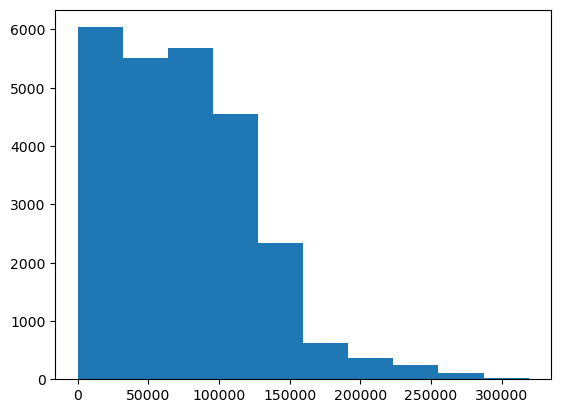

In [29]:
hist_z=plt.hist(wage_data)
hist_z
plt.show()

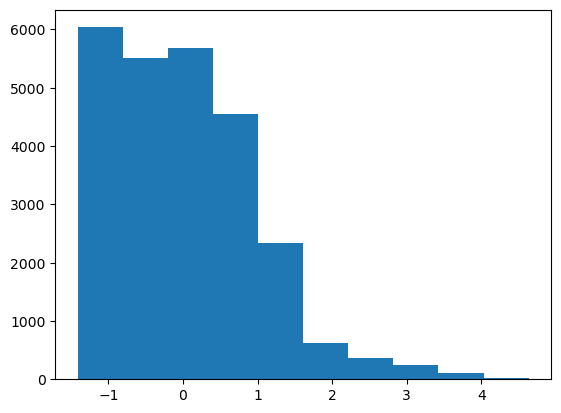

In [30]:
z_hist=plt.hist(z)
z_hist
plt.show()

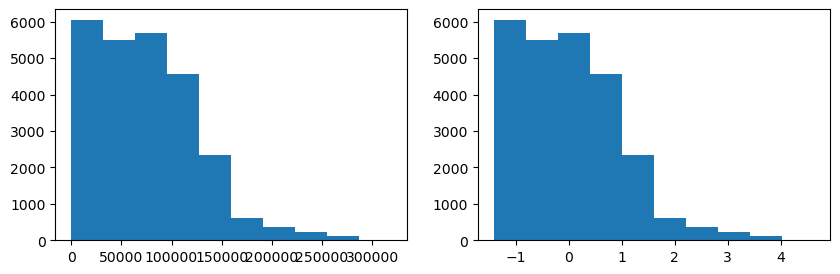

In [31]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(z)
plt.show()

In [32]:
wage_data.idxmax(),z.idxmax()

(21077, 21077)

In [33]:
wage_data.idxmin(),z.idxmin()

(20575, 20575)

- id=21077 has maximum value in both data
- id=20575 has minimum value in both data

In [34]:
visa_df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
21077,319210.2700,4.634193
20575,2.1367,-1.409710


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
wage_data=visa_df[['prevailing_wage']]
wage_data_ss=sc.fit_transform(wage_data)
wage_data_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
wage_data=visa_df[['prevailing_wage']]
wage_data_ss=sc.fit_transform(wage_data)
visa_df['wage_data_ss']=wage_data_ss

In [37]:
visa_df[['prevailing_wage','prevailing_wage_z','wage_data_ss']]

,prevailing_wage,prevailing_wage_z,wage_data_ss
0,592.2029,-1.398537,-1.398537
1,83425.6500,0.169835,0.169835
2,122996.8600,0.919079,0.919079
3,83434.0300,0.169994,0.169994
4,149907.3900,1.428604,1.428604
...,...,...,...
25475,77092.5700,0.049924,0.049924
25476,279174.7900,3.876159,3.876159
25477,146298.8500,1.360280,1.360280
25478,86154.7700,0.221509,0.221509


In [41]:
visa_df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z','wage_data_mm']]

,prevailing_wage,prevailing_wage_z,wage_data_mm
21077,319210.2700,4.634193,1.0
20575,2.1367,-1.409710,0.0


In [39]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
wage_data=visa_df[['prevailing_wage']]
wage_data_mm=minmax.fit_transform(wage_data)
visa_df['wage_data_mm']=wage_data_mm
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z,wage_data_ss,wage_data_mm
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537,-1.398537,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835,0.169835,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079,0.919079,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994,0.169994,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604,1.428604,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924,0.049924,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159,3.876159,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280,1.360280,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509,0.221509,0.269895


In [40]:
visa_df[['prevailing_wage','prevailing_wage_z','wage_data_mm']]

,prevailing_wage,prevailing_wage_z,wage_data_mm
0,592.2029,-1.398537,0.001849
1,83425.6500,0.169835,0.261345
2,122996.8600,0.919079,0.385312
3,83434.0300,0.169994,0.261371
4,149907.3900,1.428604,0.469616
...,...,...,...
25475,77092.5700,0.049924,0.241505
25476,279174.7900,3.876159,0.874579
25477,146298.8500,1.360280,0.458311
25478,86154.7700,0.221509,0.269895
